# Grouping districts of Lima Metropolitana into zones

In [12]:
import pandas as pd
import geopandas as gpd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [3]:
districts_path = '../data/raw/GIS/03 Limite Distrital Abril 2015/DISTRITO_27_04_2015.shp'
districts_df = gpd.read_file(districts_path)

In [5]:
districts_df.head()

,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,LEY,23994,19/11/1984,CODO DEL POZUZO,3322.04,0.0,0.0,0.0,POLYGON ((-75.31797010604475 -9.29528868932607...
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,LEY,23994,19/11/1984,TOURNAVISTA,2228.46,0.0,0.0,0.0,POLYGON ((-75.20831425497452 -9.10175114728463...
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,LEY,30310,16/03/2015,ALEXANDER VON HUMBOLDT,190.80,0.0,0.0,0.0,POLYGON ((-74.95634510680588 -8.79147822674985...
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,LEY,23416,01/06/1982,SAN ALEJANDRO,998.93,0.0,0.0,0.0,POLYGON ((-75.10842584135128 -8.79990430480700...
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,LEY,30310,16/03/2015,MONTE ALEGRE,579.51,0.0,0.0,0.0,POLYGON ((-75.01588753932498 -8.44637001511011...


In [16]:
is_string_dtype(districts_df['IDPROV'])

True

In [54]:
districts_lima_df = districts_df[(districts_df['IDPROV'] == '1501') | (districts_df['IDDPTO'] == '07')].reset_index()
districts_lima_df.head()

,index,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D,geometry
0,383,15,LIMA,1501,LIMA,150119,LURIN,LEY,S/N,02/01/1857,LURIN,180.26,0.86,0.0,0.0,POLYGON ((-76.93986323599995 -12.2477324799998...
1,431,15,LIMA,1501,LIMA,150102,ANCON,LEY,S/N,29/10/1874,ANCON,285.45,0.58,0.0,0.0,POLYGON ((-77.00476011945636 -11.6142695392331...
2,550,15,LIMA,1501,LIMA,150131,SAN ISIDRO,D.L.,7113,24/04/1931,SAN ISIDRO,11.10,0.00,0.0,0.0,POLYGON ((-77.02281236099998 -12.0908106049999...
3,551,15,LIMA,1501,LIMA,150120,MAGDALENA DEL MAR,LEY,4101,10/05/1920,MAGDALENA DEL MAR,3.61,0.00,0.0,0.0,POLYGON ((-77.06314261199998 -12.0865429789999...
4,553,15,LIMA,1501,LIMA,150130,SAN BORJA,LEY,23604,01/06/1983,SAN FRANCISCO DE BORJA,9.96,0.00,0.0,0.0,POLYGON ((-76.98169136199994 -12.0846288549999...


In [51]:
south = ['LURIN',
         'PUCUSANA',
         'SANTA MARIA DEL MAR',
         'CHORRILLOS',
         'VILLA MARIA DEL TRIUNFO',
         'SAN JUAN DE MIRAFLORES',
         'PUNTA NEGRA',
         'VILLA EL SALVADOR',
         'PUNTA HERMOSA',
         'SAN BARTOLO',
         'PACHACAMAC']
north = ['ANCON',
         'SANTA ROSA',
         'CARABAYLLO',
         'INDEPENDENCIA',
         'SAN MARTIN DE PORRES',
         'PUENTE PIEDRA',
         'LOS OLIVOS',
         'COMAS']
east = ['SANTA ANITA',
        'CIENEGUILLA',
        'EL AGUSTINO',
        'ATE',
        'LURIGANCHO',
        'CHACLACAYO']
modern = ['SAN ISIDRO',
          'MAGDALENA DEL MAR',
          'SAN BORJA',
          'LINCE',
          'SANTIAGO DE SURCO',
          'PUEBLO LIBRE',
          'JESUS MARIA',
          'BARRANCO',
          'MIRAFLORES',
          'SURQUILLO',
          'SAN MIGUEL',
          'LA MOLINA']
port = ['LA PUNTA',
        'LA PERLA',
        'BELLAVISTA',
        'CARMEN DE LA LEGUA REYNOSO',
        'CALLAO',
        'VENTANILLA',
        'MI PERU']
old_town = ['SAN LUIS',
            'LA VICTORIA',
            'BREÑA',
            'LIMA',
            'RIMAC']
sjl = ['SAN JUAN DE LURIGANCHO']

In [55]:
districts_lima_df['zone'] = ''
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(north)] = 'North Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(south)] = 'South Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(east)] = 'East Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(modern)] = 'Modern Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(port)] = 'Port'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(old_town)] = 'Old town'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(sjl)] = 'San Juan de Lurigancho'

/home/luis_eduardo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
districts_lima_df = districts_lima_df.dissolve(by='zone')

In [59]:
districts_lima_df

,geometry,index,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D
zone,,,,,,,,,,,,,,,,
East Lima,POLYGON ((-76.72233873599998 -11.9995939799999...,1242,15,LIMA,1501,LIMA,150137,SANTA ANITA,LEY,25116,25/10/1989,SANTA ANITA - LOS FICUS,10.69,0.00,0.0,0.0
Modern Lima,POLYGON ((-76.98169136199994 -12.0846288549999...,550,15,LIMA,1501,LIMA,150131,SAN ISIDRO,D.L.,7113,24/04/1931,SAN ISIDRO,11.10,0.00,0.0,0.0
North Lima,POLYGON ((-77.03065423599998 -11.9963887299999...,431,15,LIMA,1501,LIMA,150102,ANCON,LEY,S/N,29/10/1874,ANCON,285.45,0.58,0.0,0.0
Old town,POLYGON ((-77.04566986099996 -12.0652519799999...,1127,15,LIMA,1501,LIMA,150134,SAN LUIS,LEY,17023,30/05/1968,SAN LUIS,3.49,0.00,0.0,0.0
Port,POLYGON ((-77.15641986099996 -12.0679199799999...,559,07,CALLAO,0701,CALLAO,070105,LA PUNTA,LEY,2141,06/10/1915,LA PUNTA,0.75,17.63,0.0,0.0
San Juan de Lurigancho,POLYGON ((-76.93137311099991 -11.9421739799999...,1308,15,LIMA,1501,LIMA,150132,SAN JUAN DE LURIGANCHO,LEY,16382,13/01/1967,SAN JUAN DE LURIGANCHO,131.25,0.00,0.0,0.0
South Lima,(POLYGON ((-76.78116986099997 -12.409171854999...,383,15,LIMA,1501,LIMA,150119,LURIN,LEY,S/N,02/01/1857,LURIN,180.26,0.86,0.0,0.0


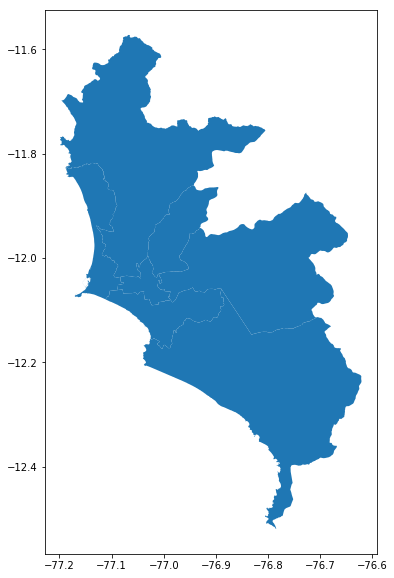

In [58]:
districts_lima_df.plot(figsize=(10, 10))